In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import math

import pickle

In [2]:
chrome_options = Options()
driver = webdriver.Chrome(options=chrome_options)
driver.set_window_size(1200,1000)
driver.get("http://localhost:3000/web1")


In [3]:
current_window_size = driver.get_window_size(windowHandle='current')
print(current_window_size)

{'width': 1200, 'height': 1000}


In [6]:
#get all elements which has id
ids = driver.find_elements("xpath","//*[@id]")
for id in ids:
    print(id.get_attribute('id'))

root
1
2
3
4
5
6
7


In [4]:

#update location of element


element_dict = {}
for id in range(1,8):

    element_dict[id] = {}
    element_dict[id]['label'] = {}
    element_dict[id]['input'] = {}
    element_label = driver.find_element("xpath","//label[@for='{}']".format(str(id)))
    element_input = driver.find_element("xpath","//*[@id='{}']".format(str(id)))
    
    element_dict[id]['label']['x_location'] = element_label.location['x']
    element_dict[id]['label']['y_location'] = element_label.location['y']
    element_dict[id]['label']['width'] = element_label.size['width']
    element_dict[id]['label']['height'] = element_label.size['height']
    element_dict[id]['label']['x_centre'] = element_label.location['x'] + round((element_label.size['width']/2.0),2)
    element_dict[id]['label']['y_centre'] = element_label.location['y'] + round((element_label.size['height']/2.0),2)
                                                                                        
    element_dict[id]['input']['x_location'] = element_input.location['x']
    element_dict[id]['input']['y_location'] = element_input.location['y']
    element_dict[id]['input']['width'] = element_input.size['width']
    element_dict[id]['input']['height'] = element_input.size['height']
    element_dict[id]['input']['x_centre'] = element_input.location['x'] + round((element_input.size['width']/2.0),1)
    element_dict[id]['input']['y_centre'] = element_input.location['y'] + round((element_input.size['height']/2.0),1)



print(element_dict)



{1: {'label': {'x_location': 76, 'y_location': 134, 'width': 81, 'height': 24, 'x_centre': 116.5, 'y_centre': 146.0}, 'input': {'x_location': 76, 'y_location': 158, 'width': 155, 'height': 38, 'x_centre': 153.5, 'y_centre': 177.0}}, 2: {'label': {'x_location': 255, 'y_location': 134, 'width': 76, 'height': 24, 'x_centre': 293.0, 'y_centre': 146.0}, 'input': {'x_location': 255, 'y_location': 158, 'width': 423, 'height': 38, 'x_centre': 466.5, 'y_centre': 177.0}}, 3: {'label': {'x_location': 701, 'y_location': 134, 'width': 75, 'height': 24, 'x_centre': 738.5, 'y_centre': 146.0}, 'input': {'x_location': 701, 'y_location': 158, 'width': 423, 'height': 38, 'x_centre': 912.5, 'y_centre': 177.0}}, 4: {'label': {'x_location': 66, 'y_location': 206, 'width': 105, 'height': 24, 'x_centre': 118.5, 'y_centre': 218.0}, 'input': {'x_location': 66, 'y_location': 230, 'width': 1068, 'height': 38, 'x_centre': 600.0, 'y_centre': 249.0}}, 5: {'label': {'x_location': 86, 'y_location': 288, 'width': 107, 

In [5]:
element_html = driver.find_element(By.XPATH, '/html')
print(element_html.location)
print(element_html.size)
image_width = element_html.size['width']
image_height = element_html.size['height']

{'x': 0, 'y': 0}
{'height': 432, 'width': 1200}


In [6]:
#driver.save_screenshot("screenshots/web.jpg")
element_html.screenshot("screenshots/web.jpg")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:352: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  warnings.warn(


True

In [7]:
#set grid size 
num_grid_x = 10
num_grid_y = 10

(1200, 432)
(1200, 432)


/var/folders/58/gd1m2zgn4hzgrrx4xcds_bg80000gp/T/ipykernel_6868/901593594.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((image_width, image_height), Image.ANTIALIAS)


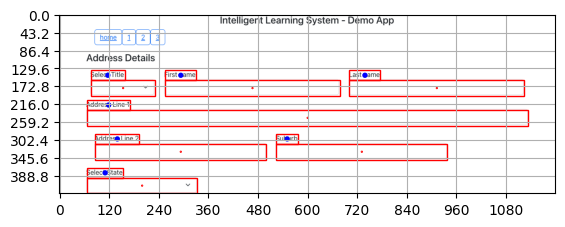

In [8]:
im = Image.open('screenshots/web.jpg')
print(im.size)

#resize
im = im.resize((image_width, image_height), Image.ANTIALIAS)
#im = im.resize((current_window_size['width'], current_window_size['height']), Image.ANTIALIAS)
print(im.size)

# Create figure and axes
fig, ax = plt.subplots()

# grid spacing
x_ticks = np.arange(0, image_width, round((image_width / num_grid_x),2))
y_ticks = np.arange(0, image_height, round((image_height / num_grid_x),2))


ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.grid(True)

# Display the image
ax.imshow(im)



for id in range(1,8):

    rect_input = patches.Rectangle((element_dict[id]['input']['x_location'] , element_dict[id]['input']['y_location']), element_dict[id]['input']['width'], element_dict[id]['input']['height'], linewidth=1, edgecolor='r', facecolor='none')
    x_centre_input = element_dict[id]['input']['x_centre']
    y_centre_input = element_dict[id]['input']['y_centre']

    rect_label = patches.Rectangle((element_dict[id]['label']['x_location'] , element_dict[id]['label']['y_location']), element_dict[id]['label']['width'], element_dict[id]['label']['height'], linewidth=1, edgecolor='r', facecolor='none')
    x_centre_label = element_dict[id]['label']['x_centre']
    y_centre_label = element_dict[id]['label']['y_centre']

    # Add the patch to the Axes
    ax.add_patch(rect_input)
    ax.add_patch(rect_label)

    #plot cente
    cir_label = patches.Circle((x_centre_label, y_centre_label), radius = 3, linewidth=2, edgecolor='b', facecolor='none')
    cir_input = patches.Circle((x_centre_input, y_centre_input), radius = 1, linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(cir_label)
    ax.add_patch(cir_input)


plt.show()

In [9]:


grid_num = {}

for id in range(1, 8):

    grid_num[id] = {}
    element_dict[id]['label']['grid_num'] = {}
    element_dict[id]['input']['grid_num'] = {}

    y_centre_label = element_dict[id]['label']['y_centre']
    x_centre_label = element_dict[id]['label']['x_centre']

    y_centre_input = element_dict[id]['input']['y_centre']
    x_centre_input = element_dict[id]['input']['x_centre']
    

    row_num_label = math.floor(y_centre_label*num_grid_y/element_html.size['height']) #this is the previous row of the element of interest
    col_num_label = math.ceil(x_centre_label*num_grid_x/element_html.size['width']) #this is the column of the element of interest
    grid_num_label = (row_num_label*num_grid_y) + col_num_label

    row_num_input = math.floor(y_centre_input*num_grid_y/element_html.size['height']) #this is the previous row of the element of interest
    col_num_input = math.ceil(x_centre_input*num_grid_x/element_html.size['width']) #this is the column of the element of interest
    grid_num_input = (row_num_input*num_grid_y) + col_num_input
    
    grid_num[id]['label'] = grid_num_label
    grid_num[id]['input'] = grid_num_input

    element_dict[id]['label']['grid_num'] = grid_num_label
    element_dict[id]['input']['grid_num'] = grid_num_input



print(grid_num)
print("\n", element_dict )

{1: {'label': 31, 'input': 42}, 2: {'label': 33, 'input': 44}, 3: {'label': 37, 'input': 48}, 4: {'label': 51, 'input': 55}, 5: {'label': 62, 'input': 73}, 6: {'label': 65, 'input': 77}, 7: {'label': 81, 'input': 92}}

 {1: {'label': {'x_location': 76, 'y_location': 134, 'width': 81, 'height': 24, 'x_centre': 116.5, 'y_centre': 146.0, 'grid_num': 31}, 'input': {'x_location': 76, 'y_location': 158, 'width': 155, 'height': 38, 'x_centre': 153.5, 'y_centre': 177.0, 'grid_num': 42}}, 2: {'label': {'x_location': 255, 'y_location': 134, 'width': 76, 'height': 24, 'x_centre': 293.0, 'y_centre': 146.0, 'grid_num': 33}, 'input': {'x_location': 255, 'y_location': 158, 'width': 423, 'height': 38, 'x_centre': 466.5, 'y_centre': 177.0, 'grid_num': 44}}, 3: {'label': {'x_location': 701, 'y_location': 134, 'width': 75, 'height': 24, 'x_centre': 738.5, 'y_centre': 146.0, 'grid_num': 37}, 'input': {'x_location': 701, 'y_location': 158, 'width': 423, 'height': 38, 'x_centre': 912.5, 'y_centre': 177.0, '

In [10]:
#export as pickle

with open('data/element_dictionary.pkl', 'wb') as f:
    pickle.dump(element_dict, f)

In [42]:
#driver.close()

In [11]:
#after training and using those parametes to fetch the actions for a given state.
#load the dictionaly. the dictionary outputs grid number. convert these to coordinates

def grid_to_coordinates(grid_num, image_width, image_height,num_grid_x, num_grid_y):
    
    num_cols, num_rows = math.modf(grid_num / num_grid_y)
    num_cols = round(num_cols,2)*10
    
    print("Row, col : ", num_rows, num_cols)
    
    y_location = ((num_rows*image_height)/num_grid_y) + (image_height*0.5/num_grid_y)
    

    x_location = ((num_cols*image_width)/num_grid_x) - (image_width*0.5/num_grid_x)
    
    return (x_location, y_location)


print(grid_to_coordinates(55, image_width, image_height,num_grid_x, num_grid_y))


Row, col :  5.0 5.0
(540.0, 237.6)


In [12]:
#import executed solution
with open('../integration/data/solution_dictionary.pkl', 'rb') as f:
    element_sol = pickle.load(f)

In [13]:
print(element_sol)

{31: {'state': array([31, 42, 44, 48, 55, 73, 77, 92]), 'action': 42}, 33: {'state': array([33, 42, 44, 48, 55, 73, 77, 92]), 'action': 44}, 37: {'state': array([37, 42, 44, 48, 55, 73, 77, 92]), 'action': 48}, 51: {'state': array([51, 42, 44, 48, 55, 73, 77, 92]), 'action': 55}, 62: {'state': array([62, 42, 44, 48, 55, 73, 77, 92]), 'action': 73}, 65: {'state': array([65, 42, 44, 48, 55, 73, 77, 92]), 'action': 77}, 81: {'state': array([81, 42, 44, 48, 55, 73, 77, 92]), 'action': 92}}


In [17]:
element_html = driver.find_element(By.XPATH, '/html')
action = webdriver.common.action_chains.ActionChains(driver)
for item in element_sol.keys():
    grid_num =element_sol[item]['action']
    input_location = grid_to_coordinates(grid_num, image_width, image_height, num_grid_x, num_grid_y)
    x_offset = round(input_location[0] - element_html.size['width']/2.0,1)
    y_offset = round(input_location[1] - element_html.size['height']/2.0,1)
    
    print("x_offset, y_offset: ", x_offset, " ",y_offset)
    action.move_to_element_with_offset(element_html, x_offset, y_offset).click().send_keys("yes").perform()


Row, col :  4.0 2.0
x_offset, y_offset:  -420.0   -21.6
Row, col :  4.0 4.0
x_offset, y_offset:  -180.0   -21.6
Row, col :  4.0 8.0
x_offset, y_offset:  300.0   -21.6
Row, col :  5.0 5.0
x_offset, y_offset:  -60.0   21.6
Row, col :  7.0 3.0
x_offset, y_offset:  -300.0   108.0
Row, col :  7.0 7.0
x_offset, y_offset:  180.0   108.0
Row, col :  9.0 2.0
x_offset, y_offset:  -420.0   194.4


In [14]:


element_html = driver.find_element(By.XPATH, '/html')
action = webdriver.common.action_chains.ActionChains(driver)
print("image_width, image_height: ", image_width, image_height)
print("html dims: ", element_html.size)
for item in range(2, len(element_dict)):
    element_html.click()
    print("\nitem: ",item)
    grid_num = element_dict[item]["input"]["grid_num"]
    print("grid_num: ", grid_num)
    input_location = grid_to_coordinates(grid_num, image_width, image_height, num_grid_x, num_grid_y)
    print("input location: ", input_location)
    x_offset = round(input_location[0] - element_html.size['width']/2.0,1)
    y_offset = round(input_location[1] - element_html.size['height']/2.0,1)
    
    print("x_offset, y_offset: ", x_offset, " ",y_offset)

    action.move_to_element_with_offset(element_html, x_offset, y_offset).click().send_keys("yes").perform()
    #action.move_by_offset(input_location[0], input_location[1]).send_keys("yes").perform()

image_width, image_height:  1200 432
html dims:  {'height': 432, 'width': 1200}

item:  2
grid_num:  44
Row, col :  4.0 4.0
input location:  (420.0, 194.4)
x_offset, y_offset:  -180.0   -21.6

item:  3
grid_num:  48
Row, col :  4.0 8.0
input location:  (900.0, 194.4)
x_offset, y_offset:  300.0   -21.6

item:  4
grid_num:  55
Row, col :  5.0 5.0
input location:  (540.0, 237.6)
x_offset, y_offset:  -60.0   21.6

item:  5
grid_num:  73
Row, col :  7.0 3.0
input location:  (300.0, 324.0)
x_offset, y_offset:  -300.0   108.0

item:  6
grid_num:  77
Row, col :  7.0 7.0
input location:  (780.0, 324.0)
x_offset, y_offset:  180.0   108.0


In [11]:
import datetime
print(datetime.datetime.now())

current_time = str(datetime.datetime.now())
print(type(current_time))
char_remov = [":", " ", ".", "-"]
current_time = current_time.replace(':',"")

for char in char_remov:
    current_time = current_time.replace(char,"")

print(current_time)


2023-04-28 11:28:35.977471
<class 'str'>
20230428112835977964
